In [2]:
"""
计算肌肉力量和特征值的相关性系数计算和显著性检验
"""

import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data_df = pd.read_csv(r"E:\Data\20230310-iFEMG肌力测试\LiRuya\Lry_bicps_br.csv", header=[0, 1], index_col=0)
data_df.head

<bound method NDFrame.head of     agonist_ch1                                                            \
   subject_name height(cm) weight(kg) gender age sensor_channel label(kg)   
0       Li Ruya        165         50      0  34       bicps_br       0.0   
1       Li Ruya        165         50      0  34       bicps_br       0.0   
2       Li Ruya        165         50      0  34       bicps_br       0.0   
3       Li Ruya        165         50      0  34       bicps_br       0.0   
4       Li Ruya        165         50      0  34       bicps_br       0.0   
5       Li Ruya        165         50      0  34       bicps_br       0.0   
6       Li Ruya        165         50      0  34       bicps_br       0.0   
7       Li Ruya        165         50      0  34       bicps_br       0.0   
8       Li Ruya        165         50      0  34       bicps_br       0.0   
9       Li Ruya        165         50      0  34       bicps_br       0.0   
10      Li Ruya        165         50      0  

In [13]:
# 获取要进行相关性分析的数据
data_2test = data_df['agonist_ch1'][['label(kg)', 'FMG_increase', 'mav', 'rms', 'wave_length', 'zero_crossing', 'slope_sign_change', 'mean_freq', 'mean_power_freq']]
data_2test.head

<bound method NDFrame.head of     label(kg)  FMG_increase       mav       rms  wave_length  zero_crossing  \
0         0.0      0.471172  2.514380  2.086666     1.263439      -0.513408   
1         0.0      0.517664  2.187099  1.613529     1.170621      -0.516341   
2         0.0      0.435896  2.003939  1.401478     0.991338      -0.509633   
3         0.0      0.534742  2.665446  2.287314     1.045893      -0.539671   
4         0.0      0.557122  2.367349  1.814453     1.013846      -0.517709   
5         0.0      0.427768  2.152498  1.771144     0.988373      -0.503691   
6         0.0      0.486281  2.873244  2.436851     1.055222      -0.559163   
7         0.0      0.497752  2.161924  1.771313     0.958577      -0.518278   
8         0.0      0.402966  1.992843  1.790840     0.961955      -0.419874   
9         0.0      0.428800  1.766193  1.527928     1.042665      -0.416658   
10        0.5      0.670838  4.081780  2.947068     3.640919      -0.333321   
11        0.5      0.5

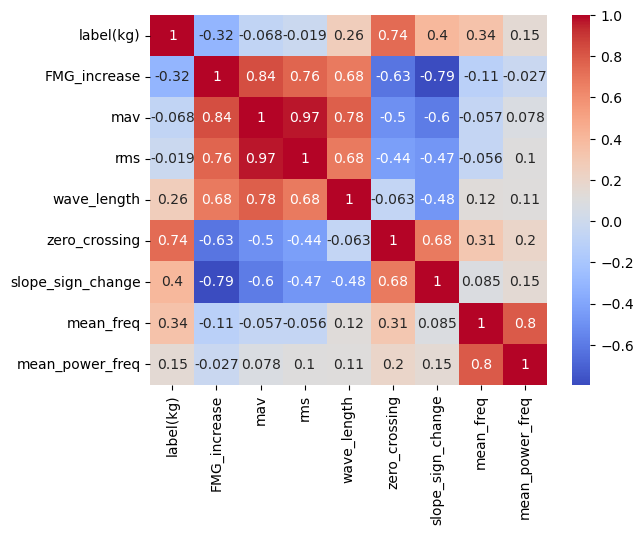

In [14]:
"""
pearson : Standard correlation coefficient
kendall : Kendall Tau correlation coefficient
spearman : Spearman rank correlation
callable: Callable with input two 1d ndarrays and returning a float.
"""
corr_result = data_2test.corr(method="pearson")

# 创建热力图
sns.heatmap(corr_result, annot=True, cmap='coolwarm')

# 显示图形
plt.show()

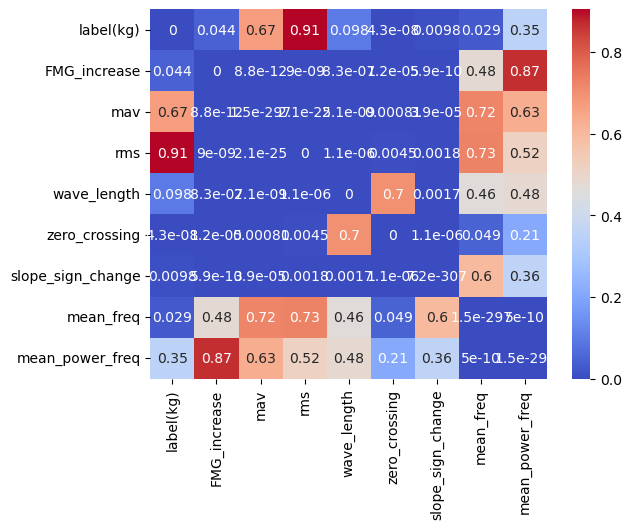

In [15]:
p_values_matrix = data_2test.apply(lambda x: data_2test.apply(lambda y: stats.pearsonr(x, y)[1]))

# 创建热力图
sns.heatmap(p_values_matrix, annot=True, cmap='coolwarm')

# 显示图形
plt.show()

In [16]:
# 皮尔逊相关系数的显著性检验
# 各个相关系数检验的统计量
def r_test_statistic(r, n): 
    """# 构建t分布  
    n:样本容量  
    r:相关系数
    """
    if r == 1:
        return 0
    else:
        a = abs(r)
        b = np.sqrt((n - 2) / (1 - r ** 2))
        c = a * b
        return c
 
# 计算各个相关系数检验的统计量
corr_test_stat = corr_result.applymap(lambda x: r_test_statistic(x, len(data_2test)))
print('--------------------------')
print(corr_test_stat)
 
"""
单样本t检验自由度dt=n-1,
独立t检验自由度dt=n-2
配对t检验自由度dt=n/2-1
"""
# 根据显著性水平0.05和自由度n-2=25-2=23， 计算t分布临界值
alpha = 0.05
t_score = stats.t.isf(alpha/2, df = len(data_2test)-2)
print('--------------------------')
print("t_score: ", t_score)
# |t| >= t_score, 表明总体两变量线性相关性显著

--------------------------
                   label(kg)  FMG_increase        mav        rms  wave_length  \
label(kg)           0.000000      2.082532   0.427694   0.120107     1.696836   
FMG_increase        2.082532      0.000000   9.568478   7.276619     5.854237   
mav                 0.427694      9.568478   0.000000  24.671421     7.743889   
rms                 0.120107      7.276619  24.671421   0.000000     5.778901   
wave_length         1.696836      5.854237   7.743889   5.778901     0.000000   
zero_crossing       6.779940      5.001162   3.630211   3.018032     0.392626   
slope_sign_change   2.717040      8.153158   4.640237   3.354216     3.379155   
mean_freq           2.262654      0.714872   0.355327   0.351017     0.740360   
mean_power_freq     0.942184      0.167379   0.486098   0.654168     0.707003   

                   zero_crossing  slope_sign_change  mean_freq  \
label(kg)               6.779940           2.717040   2.262654   
FMG_increase            5.0011

In [17]:
data_2test.corr(method="spearman")

,label(kg),FMG_increase,mav,rms,wave_length,zero_crossing,slope_sign_change,mean_freq,mean_power_freq
label(kg),1.000000,-0.607731,-0.352081,-0.370162,0.375379,0.788989,0.534329,0.380687,0.102908
FMG_increase,-0.607731,1.000000,0.756272,0.645993,0.268467,-0.789024,-0.795645,-0.221429,-0.084495
mav,-0.352081,0.756272,1.000000,0.909756,0.382230,-0.717247,-0.748258,-0.093031,0.026132
rms,-0.370162,0.645993,0.909756,1.000000,0.146864,-0.685017,-0.648432,-0.139199,0.051916
wave_length,0.375379,0.268467,0.382230,0.146864,1.000000,0.125958,-0.241986,0.208362,0.063763
zero_crossing,0.788989,-0.789024,-0.717247,-0.685017,0.125958,1.000000,0.710976,0.290941,0.149826
slope_sign_change,0.534329,-0.795645,-0.748258,-0.648432,-0.241986,0.710976,1.000000,0.076655,0.035540
mean_freq,0.380687,-0.221429,-0.093031,-0.139199,0.208362,0.290941,0.076655,1.000000,0.688328
mean_power_freq,0.102908,-0.084495,0.026132,0.051916,0.063763,0.149826,0.035540,0.688328,1.000000


In [18]:
len(data_2test)

41